- This notebook is to showcase the results plot
    * Features is known
    * Features is unknown

In [11]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_pickle_data(file_path):
    # Load the .pkl file
    with open(file_path, 'rb') as file:
        load_data = pickle.load(file)
        
    return load_data

In [161]:
load_data1 = load_pickle_data('Results_Data/Random_results_data_2023-12-29_10-21-38.pkl')
load_data2 = load_pickle_data('Results_Data/Uncertainty_results_data_2023-12-29_13-47-17.pkl')
load_data3 = load_pickle_data('Results_Data/GSx_results_data_2023-12-29_15-56-53.pkl')
load_data4 = load_pickle_data('Results_Data/GSy_results_data_2023-12-29_21-00-15.pkl')
load_data5 = load_pickle_data('Results_Data/iGS_results_data_2023-12-30_16-13-33.pkl')

In [162]:
MAEsmooth1, MAEsmooth2, MAEsmooth3, MAEsmooth4, MAEsmooth5=\
load_data1['MAEsmooth1'],load_data2['MAEsmooth1'],load_data3['MAEsmooth1'],load_data4['MAEsmooth1'], load_data5['MAEsmooth1']

In [163]:
MAEsmooth_std1, MAEsmooth_std2, MAEsmooth_std3, MAEsmooth_std4, MAEsmooth_std5=\
load_data1['MAEsmooth_std1'],load_data2['MAEsmooth_std1'],load_data3['MAEsmooth_std1'],load_data4['MAEsmooth_std1'], load_data5['MAEsmooth_std1']

In [149]:
MAEsmooth_std5[60]

array([0.00931105])

In [151]:
MAEsmooth5[50]

array([0.13975053])

In [150]:
MAEsmooth_std5[50]

array([0.01149265])

In [121]:
save_path='Results_Plot/'
filename='Results_optimal'

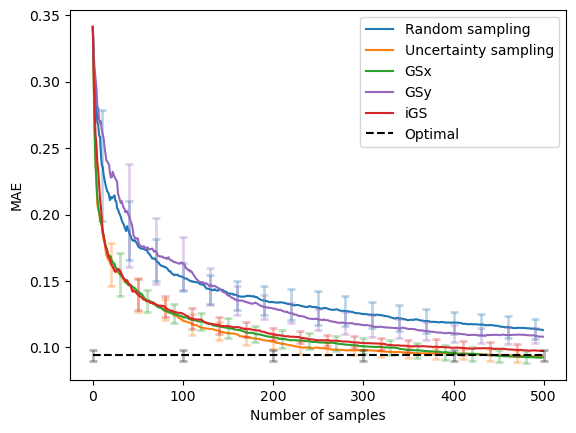

In [126]:
fig, ax = plt.subplots()

offset = 10
error_freq = 30

# List of your datasets and their corresponding standard deviation arrays
datasets = [MAEsmooth1, MAEsmooth2, MAEsmooth3, MAEsmooth4, MAEsmooth5]
std_devs = [MAEsmooth_std1, MAEsmooth_std2, MAEsmooth_std3, MAEsmooth_std4, MAEsmooth_std5]
labels = ['Random sampling', 'Uncertainty sampling', 'GSx', 'GSy', 'iGS']
# colors = ['blue', 'orange', 'green', 'purple', 'red']
tableau_colors = plt.get_cmap('tab10').colors[:5]
# Shift 4th and 5th colors to the first two positions
shifted_colors = tableau_colors[:3] + tableau_colors[4:5] + tableau_colors[3:4] 
offsets = [10, 20, 30, 40, 50]

for i, (dataset, std_dev, label, color, offset) in enumerate(zip(datasets, std_devs, labels, shifted_colors, offsets)):
    y = dataset
    e = std_dev
    x = np.arange(len(y))
    p = ax.plot(x, y, label=label, color=color)

    xe, ye, ee = x[offset::error_freq], y[offset::error_freq], e[offset::error_freq]
    xe, ye, ee = xe.flatten(), ye.flatten(), ee.flatten()
    ax.errorbar(xe, ye, yerr=ee, alpha=0.3, ls='none', ecolor=p[0].get_color(), elinewidth=2, capsize=3, capthick=2)
    offset += error_freq

# optimal line
xx = [0, 100, 200, 300, 400, 500]
yy = [opt] * len(xx)
ee = [opt_error[0]] * len(xx)

p = ax.plot(xx, yy, 'k--', label='Optimal')

ax.errorbar(xx, yy, yerr=ee, alpha=0.3, ls='none', ecolor=p[-1].get_color(), elinewidth=2, capsize=3, capthick=2)

plt.xlabel('Number of samples')
plt.ylabel('MAE')
plt.legend()
plt.savefig(save_path+filename, dpi=200)
# plt.title('MAE Smooth with Error Bars')

# plt.grid(True)

plt.show()

In [120]:
pwd

'/Users/haoliu/Documents/GitHub/Active-Learning-Using-various-representations'

In [87]:
yy

[0.09408898028999695,
 0.09408898028999695,
 0.09408898028999695,
 0.09408898028999695,
 0.09408898028999695,
 0.09408898028999695]

In [164]:
save_path='Results_Plot/'
filename='Results_optimal_short'

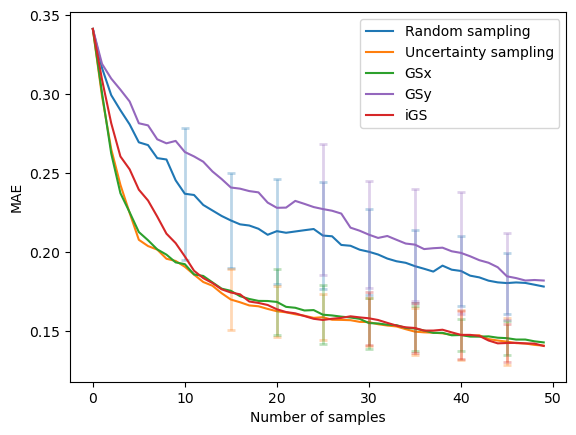

In [165]:
fig, ax = plt.subplots()

offset = 10
error_freq = 5

num_samples_to_plot = 50  # Number of samples to plot

# List of your datasets and their corresponding standard deviation arrays
datasets = [MAEsmooth1[:num_samples_to_plot], MAEsmooth2[:num_samples_to_plot],
            MAEsmooth3[:num_samples_to_plot], MAEsmooth4[:num_samples_to_plot],
            MAEsmooth5[:num_samples_to_plot]]

std_devs = [MAEsmooth_std1[:num_samples_to_plot], MAEsmooth_std2[:num_samples_to_plot],
            MAEsmooth_std3[:num_samples_to_plot], MAEsmooth_std4[:num_samples_to_plot],
            MAEsmooth_std5[:num_samples_to_plot]]

labels = ['Random sampling', 'Uncertainty sampling', 'GSx', 'GSy', 'iGS']
# colors = ['blue', 'orange', 'green', 'purple', 'red']
tableau_colors = plt.get_cmap('tab10').colors[:5]
# Shift 4th and 5th colors to the first two positions
shifted_colors = tableau_colors[:3] + tableau_colors[4:5] + tableau_colors[3:4] 

for i, (dataset, std_dev, label, color) in enumerate(zip(datasets, std_devs, labels, shifted_colors)):
    y = dataset
    e = std_dev
    x = np.arange(len(y))
    p = ax.plot(x, y, label=label, color=color)

    xe, ye, ee = x[offset::error_freq], y[offset::error_freq], e[offset::error_freq]
    xe, ye, ee = xe.flatten(), ye.flatten(), ee.flatten()
    ax.errorbar(xe, ye, yerr=ee, alpha=0.3, ls='none', ecolor=p[0].get_color(), elinewidth=2, capsize=3, capthick=2)
    offset += error_freq

# Your other plotting settings...

plt.xlabel('Number of samples')
plt.ylabel('MAE')
plt.legend()
plt.savefig(save_path+filename, dpi=200)

# plt.grid(True)

plt.show()

In [52]:
# optimal line

In [58]:
load_data = load_pickle_data('Results_Data/optimal_results_data_2024-01-04_15-03-21.pkl')

In [82]:
opt=np.mean(load_data['MAEsmooth1'])

In [74]:
opt_error=np.std(load_data['MAEsmooth1'],axis=0)

In [83]:
opt

0.09408898028999695

In [84]:
opt_error

array([0.00406635])

In [92]:
opt_error[0]

0.00406634868218839

In [98]:
# Calculate the threshold values

In [117]:
max_value = datasets[0].max()

threshold = (max_value - opt)*0.1+opt
threshold

0.11880299502997783

In [124]:
max_value = datasets[0].max()

threshold = (max_value - opt)*0.2+opt
threshold

0.1435170097699587

In [123]:
max_value

0.3412291276898058

In [115]:
# Finding indices where the values in the list are less than the specified value
indices = [index for index, val in enumerate(datasets[0]) if val < threshold]

# Displaying the indices
print("Indices where the values are less than", threshold, ":", indices)

Indices where the values are less than 0.1435170097699587 : [131, 132, 133, 134, 136, 137, 138, 139, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322,

In [119]:
indices = []
for my_list in datasets:
    index = next((index for index, val in enumerate(my_list) if val < threshold), None)
    indices.append(index)

# Displaying the indices for each list
for i, index in enumerate(indices, start=1):
    if index is not None:
        print(f"Index of the first value less than {threshold} in list {i}: {index}")
    else:
        print(f"No value less than {value} found in list {i}.")

Index of the first value less than 0.11880299502997783 in list 1: 384
Index of the first value less than 0.11880299502997783 in list 2: 106
Index of the first value less than 0.11880299502997783 in list 3: 125
Index of the first value less than 0.11880299502997783 in list 4: 270
Index of the first value less than 0.11880299502997783 in list 5: 125


In [125]:
indices = []
for my_list in datasets:
    index = next((index for index, val in enumerate(my_list) if val < threshold), None)
    indices.append(index)

# Displaying the indices for each list
for i, index in enumerate(indices, start=1):
    if index is not None:
        print(f"Index of the first value less than {threshold} in list {i}: {index}")
    else:
        print(f"No value less than {value} found in list {i}.")

Index of the first value less than 0.1435170097699587 in list 1: 131
Index of the first value less than 0.1435170097699587 in list 2: 45
Index of the first value less than 0.1435170097699587 in list 3: 48
Index of the first value less than 0.1435170097699587 in list 4: 142
Index of the first value less than 0.1435170097699587 in list 5: 44


In [40]:
# for features unknown

In [166]:
def plot_curves(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, save_path, filename, samll=False):
    fig, ax = plt.subplots()

    if samll==True:
        offset = 10
        error_freq = 5

        num_samples_to_plot = 50  # Number of samples to plot
        # List of your datasets and their corresponding standard deviation arrays
        datasets = [d1[:num_samples_to_plot], d2[:num_samples_to_plot],
                    d3[:num_samples_to_plot], d4[:num_samples_to_plot],
                    d5[:num_samples_to_plot]]
        
        std_devs = [s1[:num_samples_to_plot], s2[:num_samples_to_plot],
                    s3[:num_samples_to_plot], s4[:num_samples_to_plot],
                    s5[:num_samples_to_plot]]

    else:

        offset = 10
        error_freq = 30
        
        # List of your datasets and their corresponding standard deviation arrays
        datasets = [d1, d2, d3, d4, d5]
        std_devs = [s1, s2, s3, s4, s5]
        
    labels = ['Random sampling', 'Uncertainty sampling', 'GSx', 'GSy', 'iGS']
    # colors = ['blue', 'orange', 'green', 'purple', 'red']
    tableau_colors = plt.get_cmap('tab10').colors[:5]
    # Shift 4th and 5th colors to the first two positions
    shifted_colors = tableau_colors[:3] + tableau_colors[4:5] + tableau_colors[3:4] 
    
    for i, (dataset, std_dev, label, color) in enumerate(zip(datasets, std_devs, labels, shifted_colors)):
        y = dataset
        e = std_dev
        x = np.arange(len(y))
        p = ax.plot(x, y, label=label, color=color)
    
        xe, ye, ee = x[offset::error_freq], y[offset::error_freq], e[offset::error_freq]
        xe, ye, ee = xe.flatten(), ye.flatten(), ee.flatten()
        ax.errorbar(xe, ye, yerr=ee, alpha=0.3, ls='none', ecolor=p[0].get_color(), elinewidth=2, capsize=3, capthick=2)
        offset += error_freq
    
    # Your other plotting settings...
    
    plt.xlabel('Number of samples')
    plt.ylabel('MAE')
    # plt.title('MAE Smooth with Error Bars')
    plt.legend()
    plt.savefig(save_path+filename, dpi=200)

    # plt.grid(True)
    
    plt.show()

In [127]:
load_data1 = load_pickle_data('Results_Data/Random_fs_results_data_2023-12-31_16-15-35.pkl')
load_data2 = load_pickle_data('Results_Data/Uncertainty_fs_results_data_2024-01-01_00-12-13.pkl')
load_data3 = load_pickle_data('Results_Data/GSx_alg_fs_results_data_2024-01-01_12-11-55.pkl')
load_data4 = load_pickle_data('Results_Data/GSy_alg_fs_results_data_2024-01-01_15-30-59.pkl')
load_data5 = load_pickle_data('Results_Data/iGS_alg_fs_results_data_2024-01-02_00-45-51.pkl')

In [128]:
d1, d2, d3, d4, d5=\
load_data1['MAEsmooth1'],load_data2['MAEsmooth1'],load_data3['MAEsmooth1'],load_data4['MAEsmooth1'], load_data5['MAEsmooth1']

In [129]:
s1, s2, s3, s4, s5=\
load_data1['MAEsmooth_std1'],load_data2['MAEsmooth_std1'],load_data3['MAEsmooth_std1'],load_data4['MAEsmooth_std1'], load_data5['MAEsmooth_std1']

In [131]:
# Assuming d1, d2, d3, d4, d5 are NumPy arrays or Pandas Series
variables = ['d1', 'd2', 'd3', 'd4', 'd5']
data = [d1, d2, d3, d4, d5]

min_value = np.inf  # Set initial minimum value as infinity
min_variable = None  # Variable to store the variable name with the smallest value

for variable, values in zip(variables, data):
    current_min = np.min(values)  # Calculate the minimum value for the current variable
    if current_min < min_value:
        min_value = current_min
        min_variable = variable

print(f"The smallest value {min_value} is from variable {min_variable}")

The smallest value 0.05553476468246514 is from variable d2


In [ ]:
# So uncertainty selected features are slected 
# which is d3, d11, d20, d2, d21, d8, d19, d18, d10

In [132]:
def get_input_optimal_fs(myfile):
    '''
    Get data with knowing salient features
    '''
    df_load = pd.read_csv(myfile)

    df_load['JSC']=df_load['JSC'].abs()
    df_reduce=df_load.iloc[:,3:]
    df_refine=df_reduce.iloc[:,np.r_[0:3,4:23]]
    # x = df_refine.values #returns a numpy array
    # standard_scaler = preprocessing.StandardScaler()
    # x_scaled = standard_scaler.fit_transform(x)
    # df_refine_standardize = pd.DataFrame(x_scaled)
    # df_refine_standardize.columns=df_refine.columns
    df_refine_standardize = normalized_data(df_refine)

    X = df_refine_standardize.loc[:,['STAT_e', 'DISS_f10_D', 'CT_n_D_adj_An', 'CT_n_A_adj_Ca', 'DISS_wf10_D', 'STAT_CC_D_An', 'CT_f_A_tort1',\
                                    'CT_f_D_tort1', 'ABS_wf_D']]    
    y = df_refine_standardize.loc[:,['JSC']]

    return X, y

In [133]:
load_data = load_pickle_data('Results_Data/optimal_fs_results_data_2024-01-08_19-39-37.pkl')

In [134]:
opt=np.mean(load_data['MAEsmooth1'])

In [135]:
opt_error=np.std(load_data['MAEsmooth1'],axis=0)

In [136]:
opt

0.04886515942165073

In [137]:
opt_error

array([0.00199208])

In [144]:
datasets = [d1, d2, d3, d4, d5]
datasets_std = [s1, s2, s3, s4, s5]

In [148]:
s5[60]

array([0.01162167])

In [142]:
max_value = datasets[0].max()

threshold = (max_value - opt)*0.2+opt
threshold

0.12849613355415507

In [143]:
indices = []
for my_list in datasets:
    index = next((index for index, val in enumerate(my_list) if val < threshold), None)
    indices.append(index)

# Displaying the indices for each list
for i, index in enumerate(indices, start=1):
    if index is not None:
        print(f"Index of the first value less than {threshold} in list {i}: {index}")
    else:
        print(f"No value less than {threshold} found in list {i}.")

Index of the first value less than 0.12849613355415507 in list 1: 80
Index of the first value less than 0.12849613355415507 in list 2: 58
Index of the first value less than 0.12849613355415507 in list 3: 55
Index of the first value less than 0.12849613355415507 in list 4: 82
Index of the first value less than 0.12849613355415507 in list 5: 60


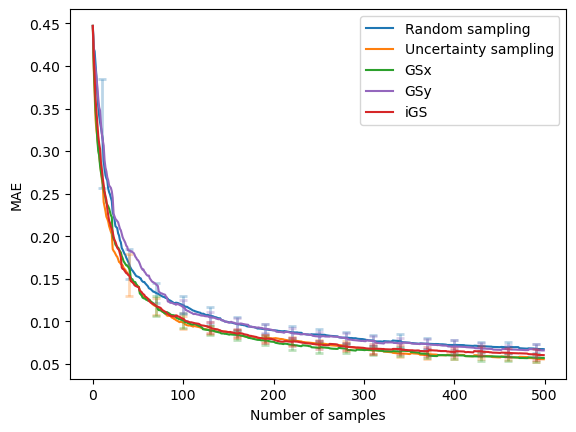

In [51]:
plot_curves(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, samll=False)

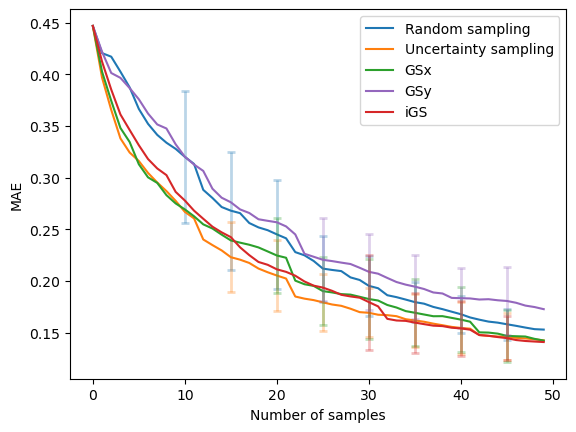

In [50]:
plot_curves(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, samll=True)

In [152]:
save_path='Results_Plot/'
filename='Results_optimal_fs'

In [158]:
def plot_curves_optimal(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, opt, opt_error, samll=False):
    fig, ax = plt.subplots()

    if samll==True:
        offset = 10
        error_freq = 5

        num_samples_to_plot = 50  # Number of samples to plot
        # List of your datasets and their corresponding standard deviation arrays
        datasets = [d1[:num_samples_to_plot], d2[:num_samples_to_plot],
                    d3[:num_samples_to_plot], d4[:num_samples_to_plot],
                    d5[:num_samples_to_plot]]
        
        std_devs = [s1[:num_samples_to_plot], s2[:num_samples_to_plot],
                    s3[:num_samples_to_plot], s4[:num_samples_to_plot],
                    s5[:num_samples_to_plot]]

    else:

        # offset = 10
        error_freq = 30
        
        # List of your datasets and their corresponding standard deviation arrays
        datasets = [d1, d2, d3, d4, d5]
        std_devs = [s1, s2, s3, s4, s5]
        
    labels = ['Random sampling', 'Uncertainty sampling', 'GSx', 'GSy', 'iGS']
    # colors = ['blue', 'orange', 'green', 'purple', 'red']
    tableau_colors = plt.get_cmap('tab10').colors[:5]
    # Shift 4th and 5th colors to the first two positions
    shifted_colors = tableau_colors[:3] + tableau_colors[4:5] + tableau_colors[3:4] 
    offsets = [10, 20, 30, 40, 50]
    
    for i, (dataset, std_dev, label, color, offset) in enumerate(zip(datasets, std_devs, labels, shifted_colors, offsets)):
        y = dataset
        e = std_dev
        x = np.arange(len(y))
        p = ax.plot(x, y, label=label, color=color)
    
        xe, ye, ee = x[offset::error_freq], y[offset::error_freq], e[offset::error_freq]
        xe, ye, ee = xe.flatten(), ye.flatten(), ee.flatten()
        ax.errorbar(xe, ye, yerr=ee, alpha=0.3, ls='none', ecolor=p[0].get_color(), elinewidth=2, capsize=3, capthick=2)
        offset += error_freq
    
    # Your other plotting settings...
    # optimal line
    xx = [0, 100, 200, 300, 400, 500]
    yy = [opt] * len(xx)
    ee = [opt_error[0]] * len(xx)
    
    p = ax.plot(xx, yy, 'k--', label='Optimal')
    
    ax.errorbar(xx, yy, yerr=ee, alpha=0.3, ls='none', ecolor=p[-1].get_color(), elinewidth=2, capsize=3, capthick=2)
    
    plt.xlabel('Number of samples')
    plt.ylabel('MAE')
    plt.legend()
    plt.savefig(save_path+filename, dpi=200)
    
    plt.show()

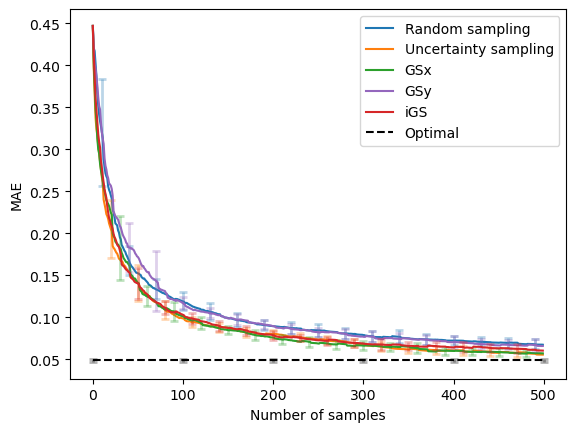

In [155]:
plot_curves(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, opt, opt_error, samll=False)

In [156]:
threshold

0.12849613355415507

In [167]:
save_path='Results_Plot/'
filename='Results_optimal_fs_short'

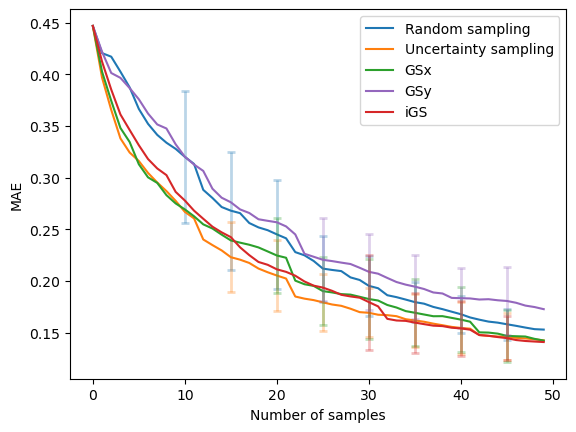

In [168]:
plot_curves(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, save_path, filename, samll=True)